In [35]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

In [2]:
df = pd.read_csv(r"C:\Users\ayush\Downloads\Social_Network_Ads.csv")

In [3]:
df.head(3)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0


In [4]:
df = df.drop(['User ID','Gender'],axis=1)

In [5]:
df.head(3)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0


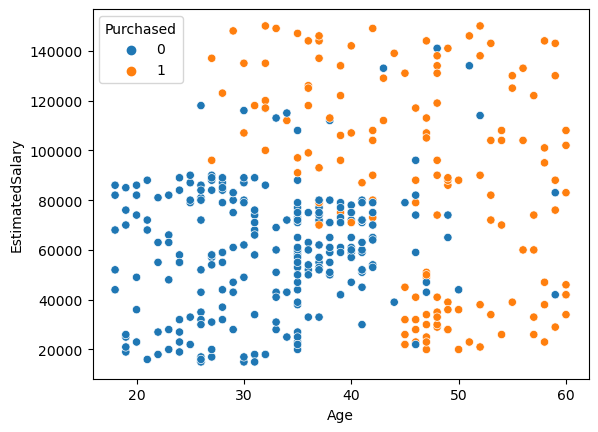

In [34]:
sns.scatterplot(x='Age',y='EstimatedSalary',data=df,hue='Purchased')
plt.show()

In [8]:
df.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [12]:
x = df.iloc[:,:-1]
y = df['Purchased']

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
sc = StandardScaler()
sc.fit(x)

StandardScaler()

In [15]:
x = pd.DataFrame(sc.transform(x),columns=x.columns)

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [20]:
from sklearn.tree import DecisionTreeClassifier

In [65]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [66]:
dt1 = DecisionTreeClassifier(criterion='entropy',max_depth=3)
dt1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [67]:
dt.score(x_test,y_test)*100

91.25

In [68]:
dt.score(x_train,y_train)*100

91.875

In [69]:
dt1.score(x_test,y_test)*100

91.25

In [70]:
dt.predict([[35,20000]])

C:\Users\ayush\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [71]:
from sklearn.tree import plot_tree

C:\Users\ayush\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


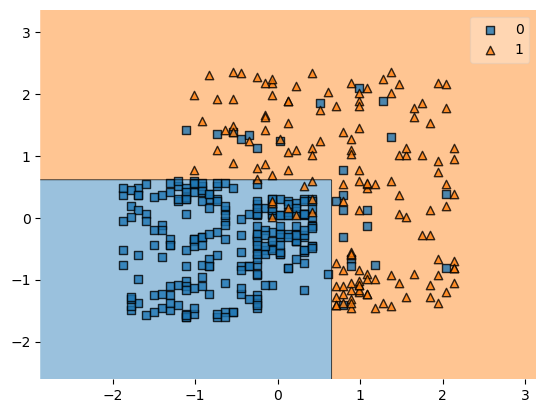

In [72]:
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=dt)
plt.show()

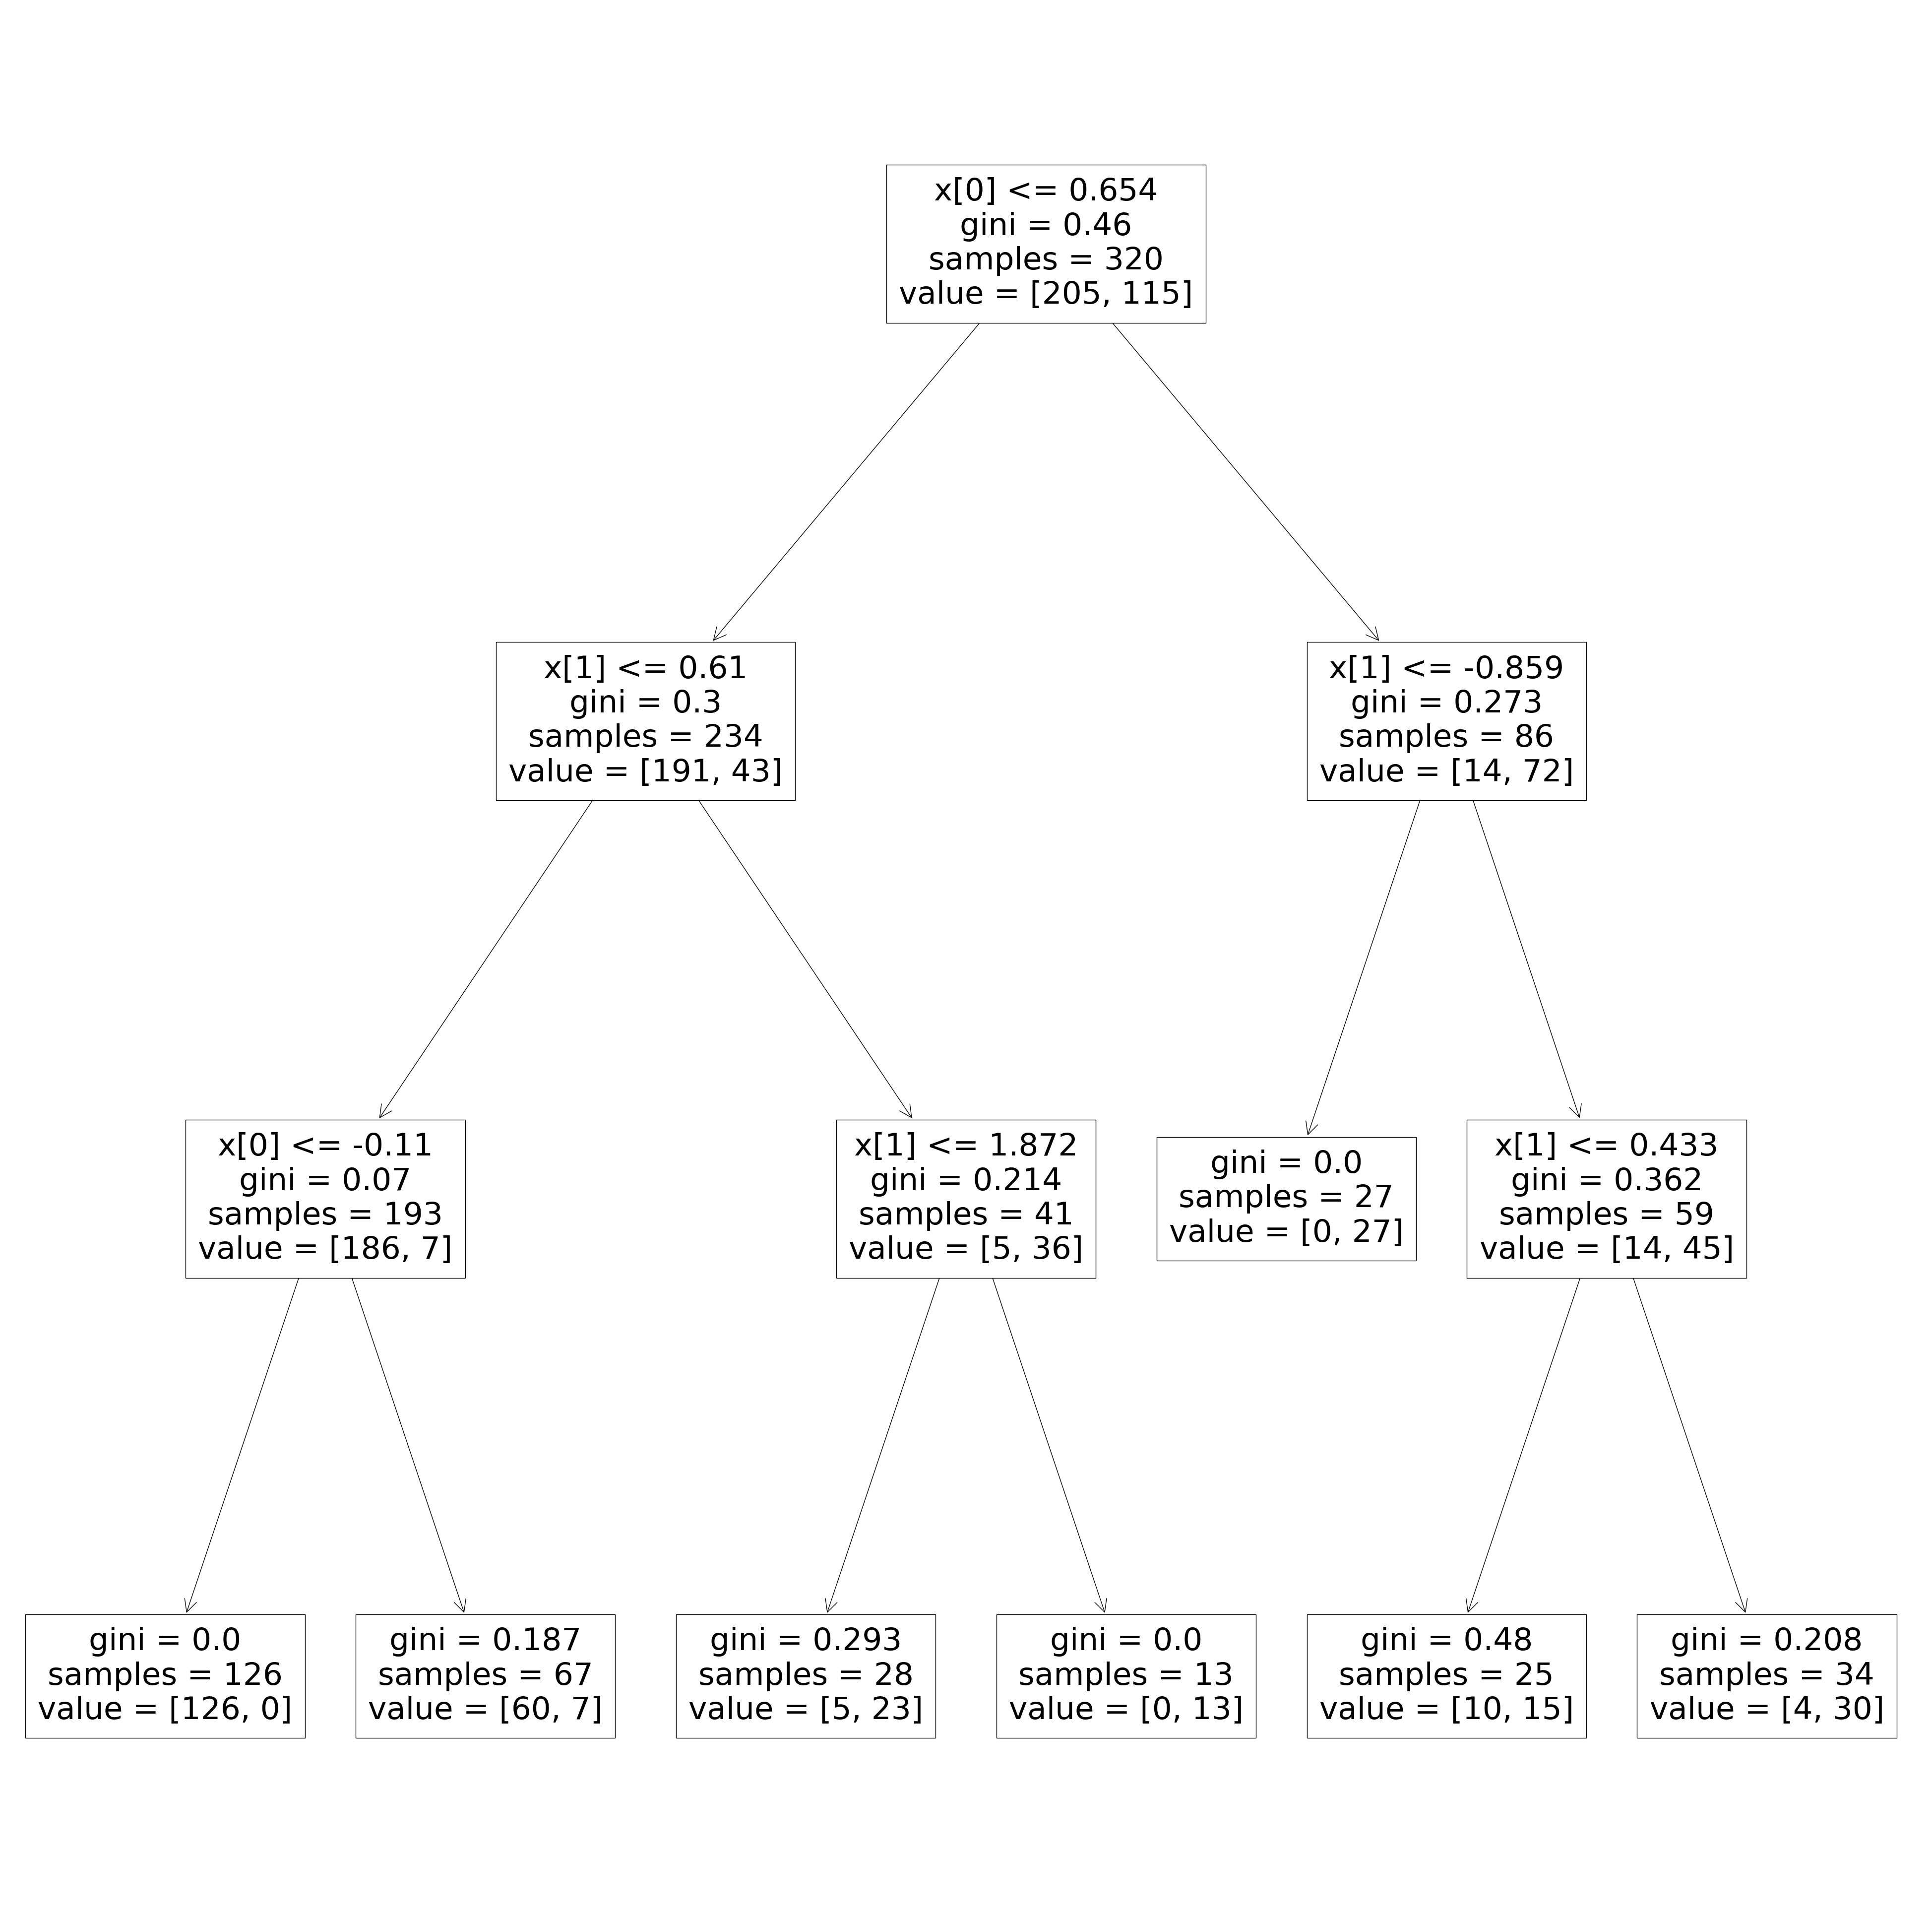

In [73]:
plt.figure(figsize=(50,50))
plot_tree (dt)
plt.savefig('myfig')
plt.show()

In [74]:
for i in range(1,20):
    dt2 = DecisionTreeClassifier(max_depth=i)
    dt2.fit(x_train,y_train)
    print(dt2.score(x_train,y_train),dt2.score(x_test,y_test),i)

0.821875 0.9 1
0.91875 0.9125 2
0.91875 0.9125 3
0.93125 0.9125 4
0.934375 0.9 5
0.95 0.8625 6
0.96875 0.85 7
0.975 0.85 8
0.98125 0.85 9
0.984375 0.85 10
0.990625 0.8375 11
0.990625 0.8375 12
0.99375 0.8375 13
0.996875 0.8375 14
0.996875 0.8375 15
0.996875 0.8375 16
0.996875 0.8375 17
0.996875 0.8375 18
0.996875 0.8375 19
